## __Lending Club Case Study__

#### __Loading Libraries__

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

#### __Loading Data & Exploration__

In [2]:
loan_df = pd.read_csv('loan.csv')
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
loan_df.shape

(39717, 111)

#### __Checking for null values__

In [4]:
loan_df.isnull().sum().sort_values(ascending=False)

num_il_tl                39717
num_bc_sats              39717
num_bc_tl                39717
num_actv_bc_tl           39717
num_accts_ever_120_pd    39717
                         ...  
installment                  0
policy_code                  0
application_type             0
acc_now_delinq               0
delinq_amnt                  0
Length: 111, dtype: int64

In [5]:
loan_df.columns[loan_df.isnull().all()].tolist()

['mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_lim',
 'total_bal

__There are a lot of empty columns in the dataset. As they do not add any value to our analysis, removing them from the dataset to get a cleaner dataset.__

In [6]:
loan_df.dropna(axis=1,how ='all',inplace=True)

In [7]:
loan_df.shape

(39717, 57)

#### __Number of Unique Observations in each column__

In [8]:
loan_df.nunique().sort_values(ascending= False)

id                            39717
member_id                     39717
url                           39717
total_pymnt                   37850
total_pymnt_inv               37518
total_rec_int                 35148
last_pymnt_amnt               34930
emp_title                     28820
desc                          26526
revol_bal                     21711
title                         19615
installment                   15383
funded_amnt_inv                8205
total_rec_prncp                7976
annual_inc                     5318
recoveries                     4040
dti                            2868
collection_recovery_fee        2616
total_rec_late_fee             1356
out_prncp_inv                  1138
out_prncp                      1137
revol_util                     1089
funded_amnt                    1041
loan_amnt                       885
zip_code                        823
earliest_cr_line                526
int_rate                        371
mths_since_last_record      

__There are few columns with only 1 unique value. They will not add any additional information in our analysis ( to identify defaults/ non-defaults) , hence they are removed from the data to get a cleaner dataset.__

In [9]:
columns_with_1_unique_value=loan_df.columns[loan_df.nunique()==1].to_list()

In [10]:
loan_df.drop(columns_with_1_unique_value, axis = 1, inplace = True)

In [11]:
loan_df.shape

(39717, 48)

#### __Checking Duplicate Rows__

In [12]:
loan_df[loan_df.duplicated()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies


__There are no duplicate rows__

#### __Removing the Loan_Status = 'Current' Observations__

In [13]:
loan_df.loan_status.value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

__For the Loan_Status = 'Current',  tenure of the loans is not yet completed. Since, we are analyzing the driving factors behind the loan default. This data is not included in the analysis.__

In [14]:
loan_df=loan_df[loan_df.loan_status != 'Current']

In [15]:
loan_df.shape

(38577, 48)

#### __Removing other Unintuitive Columns__

Removing the list of variables mentioned below as they are not useful for identifying driving variables for default.The variables included in the list are:

- Post loan features 
- Payment Amounts which are more appropriate for Loss Estimation rather than serving as default risk drivers
- User IDs
- Text Columns
- Other unituitive variables

In [16]:
# List the columns not required for the analysis. Total 19 columns
drop_cols = [
'collection_recovery_fee',
'emp_title',
'id',
'inq_last_6mths',
'last_pymnt_amnt',
'last_pymnt_d',
'member_id',
'next_pymnt_d',
'out_prncp',
'out_prncp_inv',
'recoveries',
'total_pymnt',
'total_pymnt_inv',
'total_rec_int',
'total_rec_late_fee',
'total_rec_prncp',
'url',
'zip_code',
'desc',
'title',
'last_credit_pull_d',
'earliest_cr_line',
'delinq_2yrs'
]

loan_df.drop(drop_cols, axis = 1, inplace = True)

#### __Missing Value Treatment__

In [17]:
(loan_df.isnull().sum() / len(loan_df))*100

loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
term                       0.000000
int_rate                   0.000000
installment                0.000000
grade                      0.000000
sub_grade                  0.000000
emp_length                 2.677761
home_ownership             0.000000
annual_inc                 0.000000
verification_status        0.000000
issue_d                    0.000000
loan_status                0.000000
purpose                    0.000000
addr_state                 0.000000
dti                        0.000000
mths_since_last_delinq    64.559193
mths_since_last_record    92.897322
open_acc                   0.000000
pub_rec                    0.000000
revol_bal                  0.000000
revol_util                 0.129611
total_acc                  0.000000
pub_rec_bankruptcies       1.806776
dtype: float64

__Dropping the columns with high missing percentage (>=65 %) .__

In [18]:
high_missing_columns=loan_df.columns[round((loan_df.isnull().sum() / len(loan_df))*100) >= 65].to_list()
loan_df.drop(high_missing_columns,axis=1,inplace=True)

In [19]:
loan_df.shape

(38577, 23)

#### __Missing Value Treatment__

In [20]:
#Checking the Data Types
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt           38577 non-null  int64  
 2   funded_amnt_inv       38577 non-null  float64
 3   term                  38577 non-null  object 
 4   int_rate              38577 non-null  object 
 5   installment           38577 non-null  float64
 6   grade                 38577 non-null  object 
 7   sub_grade             38577 non-null  object 
 8   emp_length            37544 non-null  object 
 9   home_ownership        38577 non-null  object 
 10  annual_inc            38577 non-null  float64
 11  verification_status   38577 non-null  object 
 12  issue_d               38577 non-null  object 
 13  loan_status           38577 non-null  object 
 14  purpose               38577 non-null  object 
 15  addr_state            38

In [21]:
loan_df.pub_rec_bankruptcies.describe()

count    37880.000000
mean         0.043479
std          0.204583
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64

In [22]:
loan_df.emp_length.value_counts()

emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

In [23]:
#Removing the % sign from revol_util and converting t string
loan_df.revol_util=loan_df.revol_util.apply(lambda x: x[:-1] if isinstance(x, str) else x).astype('float')

In [24]:
loan_df.revol_util.describe()

count    38527.000000
mean        48.702777
std         28.364741
min          0.000000
25%         25.200000
50%         49.100000
75%         72.300000
max         99.900000
Name: revol_util, dtype: float64

Analysing the variables with missing values. Following values will be used for missing value imputation:
- pub_rec_bankruptcies-median 
(as most of the distribution is concentrated around 0 , median is a more appropriate metric. Mean might be influenced by extreme values)
- emp_length-mode
(categorical variable substitution with mode. Also, 10+ year count is much higher than other observations count)
- revol_util-mean
(As the distribution looks even , for revol_util mean substitution can be done)

In [25]:
loan_df.pub_rec_bankruptcies.fillna(loan_df.pub_rec_bankruptcies.median(),inplace=True)
loan_df.emp_length.fillna(loan_df.emp_length.mode()[0],inplace=True)
loan_df.revol_util.fillna(loan_df.revol_util.mean(),inplace=True)



#### __Other Imputations__

Home Ownership has only 3 values of None . Therefore, combining it with other.

In [26]:
loan_df.home_ownership.value_counts()

home_ownership
RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: count, dtype: int64

In [27]:
loan_df.home_ownership.replace('NONE','OTHER',inplace=True)

#### __Standardize the Data__

Convert Data to correct data types:
- convert term to float
- convert int_rate to float
- revol_util was already converted to float post removal of % sign (during missing value imputation)
- issue_d to datetime


In [28]:
loan_df.term = loan_df.term.apply(lambda x:x.replace(' months','')).astype('float')
loan_df.int_rate=loan_df.int_rate.apply(lambda x:x.replace('%','')).astype('float')
loan_df.issue_d=pd.to_datetime(loan_df.issue_d,format='%b-%y')

#### __Outlier Treatment__

Analyzing the below columns for potential outliers:
- loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,revol_bal

Text(0, 0.5, 'Values')

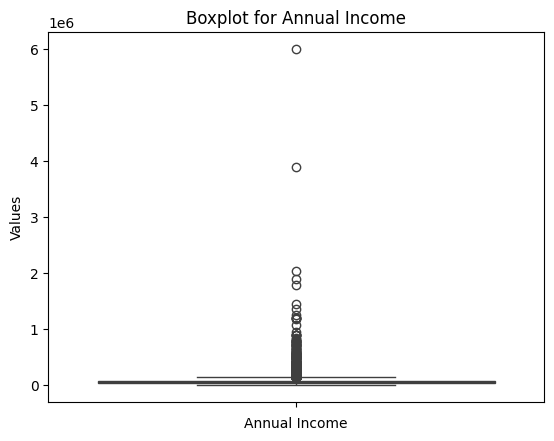

In [29]:
#Boxplot for Annual Income
sns.boxplot(loan_df.annual_inc)
plt.title('Boxplot for Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Values')

__There are clearly outliers at the upper end of the annual income. Hence, removing the outliers .
Removing the observations greater than Q3+1.5*IQR (categorising them as outliers).__

In [30]:
Q1=np.quantile(loan_df.annual_inc,0.25)
Q3=np.quantile(loan_df.annual_inc,0.75)
IQR= (Q3-Q1)
UL= Q3+ (1.5*IQR)

In [31]:
loan_df=loan_df[loan_df.annual_inc <UL]

Text(0, 0.5, 'Values')

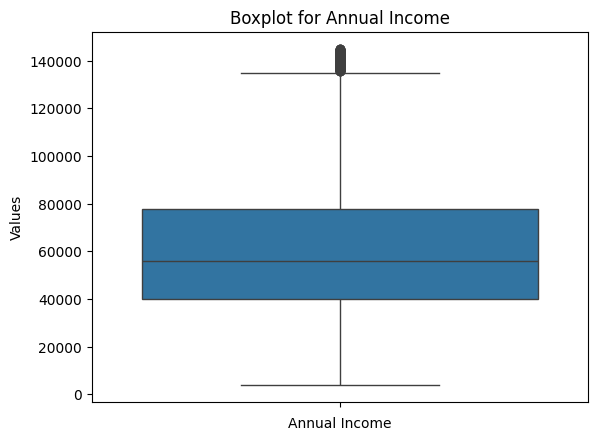

In [32]:
sns.boxplot(loan_df.annual_inc)
plt.title('Boxplot for Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Values')

Text(0, 0.5, 'Values')

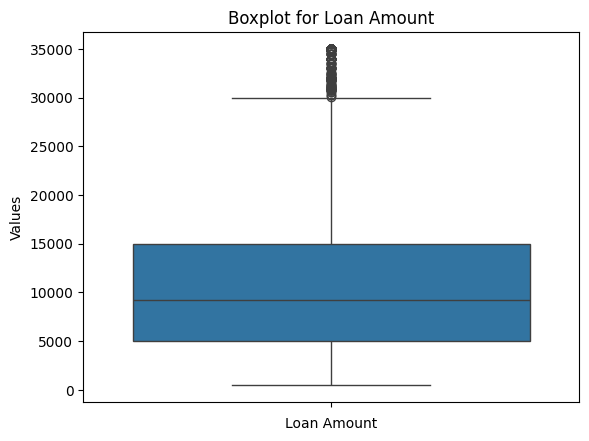

In [33]:
sns.boxplot(loan_df.loan_amnt)
plt.title('Boxplot for Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Values')

Text(0, 0.5, 'Values')

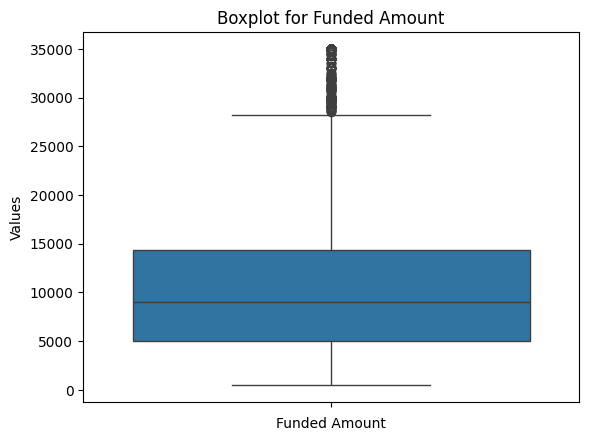

In [34]:
sns.boxplot(loan_df.funded_amnt)
plt.title('Boxplot for Funded Amount')
plt.xlabel('Funded Amount')
plt.ylabel('Values')

Text(0, 0.5, 'Values')

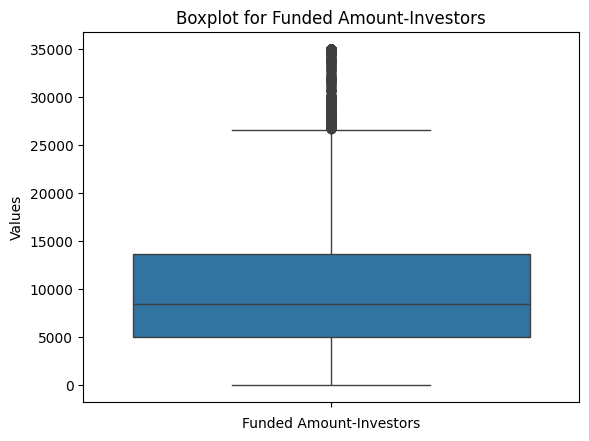

In [35]:
sns.boxplot(loan_df.funded_amnt_inv)
plt.title('Boxplot for Funded Amount-Investors')
plt.xlabel('Funded Amount-Investors')
plt.ylabel('Values')

Text(0, 0.5, 'Values')

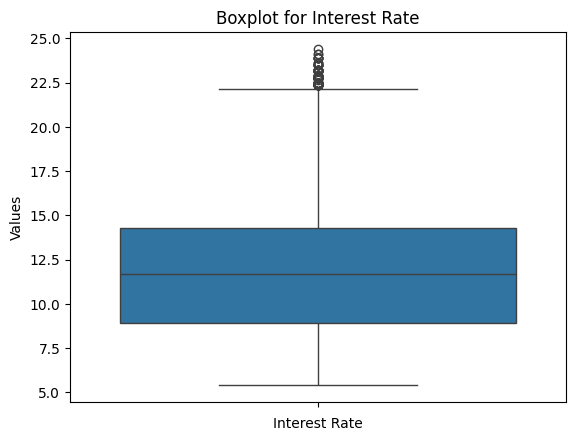

In [36]:
sns.boxplot(loan_df.int_rate)
plt.title('Boxplot for Interest Rate')
plt.xlabel('Interest Rate')
plt.ylabel('Values')

Text(0, 0.5, 'Values')

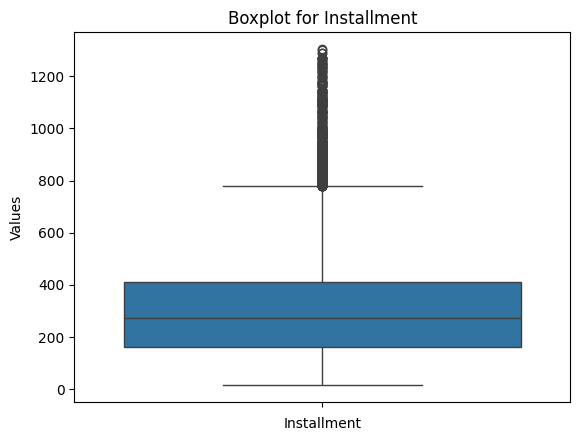

In [37]:
sns.boxplot(loan_df.installment)
plt.title('Boxplot for Installment')
plt.xlabel('Installment')
plt.ylabel('Values')

Text(0, 0.5, 'Values')

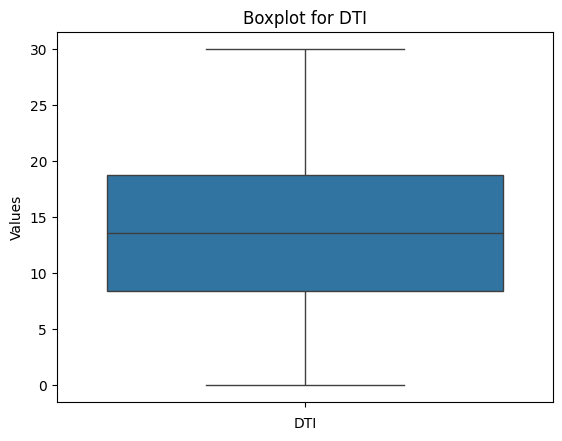

In [38]:
sns.boxplot(loan_df.dti)
plt.title('Boxplot for DTI')
plt.xlabel('DTI')
plt.ylabel('Values')

Text(0, 0.5, 'Values')

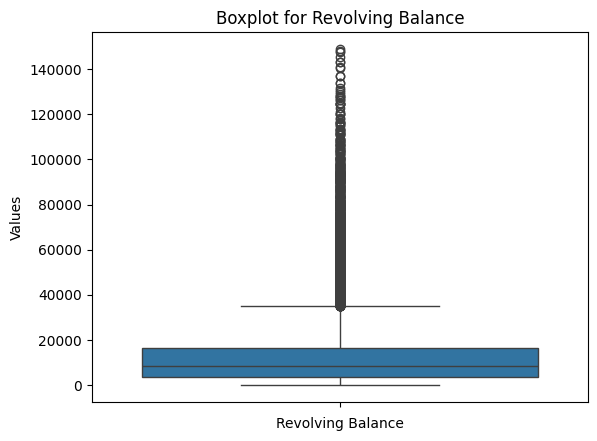

In [39]:
sns.boxplot(loan_df.revol_bal)
plt.title('Boxplot for Revolving Balance')
plt.xlabel('Revolving Balance')
plt.ylabel('Values')

Even though other columns have some outliers , but as they are not extreme, we will proceed without removing them.
#Summarize

#### __Derived Metrics__

- Deriving year, month and quarter from issue date.
- Creating binned fields for quantitative variables (loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,revol_bal)

In [40]:
#Deriving year, month and quarter from issue date
loan_df['issue_y']=loan_df.issue_d.dt.year
loan_df['issue_m']=loan_df.issue_d.dt.month
loan_df['issue_q']=loan_df.issue_d.dt.quarter

In [41]:
loan_df['loan_amnt_binned']=pd.cut(loan_df.loan_amnt,[0,5000,10000,15000,20000,25000,30000,35000],labels=['0-5K','5K-10K','10K-15K','15K-20K','20K-25K','25K-30K','30K-35K'])
loan_df['funded_amnt_binned']=pd.cut(loan_df.funded_amnt,[0,5000,10000,15000,20000,25000,30000,35000],labels=['0-5K','5K-10K','10K-15K','15K-20K','20K-25K','25K-30K','30K-35K'])
#starting with -1 as there are few 0 values
loan_df['funded_amnt_inv_binned']=pd.cut(loan_df.funded_amnt_inv,[-1,5000,10000,15000,20000,25000,30000,35000],labels=['0-5K','5K-10K','10K-15K','15K-20K','20K-25K','25K-30K','30K-35K'])
loan_df['int_rate_binned']=pd.cut(loan_df.int_rate,[0,5,10,15,20,25],labels=['0-5%','5%-10%','10%-15%','15%-20%','20%-25%'])
loan_df['installment_binned']=pd.cut(loan_df.installment,[0,250,500,750,1000,1250,1500],labels=['0-250','250-500','500-750','750-1000','1000-1250','1250-1500'])
loan_df['annual_inc_binned']=pd.cut(loan_df.annual_inc,[0,30000,60000,90000,120000,150000],labels=['0-30K','30K-60K','60K-90K','90K-120K','120K-150K'])
loan_df['dti_binned']=pd.cut(loan_df.dti,[-1,6,12,18,24,30],labels=['0-10','10-15','15-20','20-25','25-30'])
loan_df['revol_bal_binned']=pd.cut(loan_df.revol_bal,[-1,25000,50000,75000,100000,125000,150000],labels=['0-25K','25K-50K','50K-75K','75K-100K','100K-125K','125K-150K'])
loan_df['revol_util_binned']=pd.cut(loan_df.revol_bal,[-1,25,50,75,100],labels=['0-25','25-50','50-75','75-100'])
loan_df['total_acc_binned']=pd.cut(loan_df.total_acc,[0,25,50,75,100],labels=['0-25','25-50','50-75','75-100'])
loan_df['open_acc_binned']=pd.cut(loan_df.open_acc,[0,10,20,35,40,50],labels=['0-10','10-20','20-30','30-40','40-50'])


In [42]:
loan_df.dti.describe()

count    36754.000000
mean        13.439892
std          6.660922
min          0.000000
25%          8.340000
50%         13.570000
75%         18.700000
max         29.990000
Name: dti, dtype: float64

In [43]:
loan_df.open_acc.describe()

count    36754.000000
mean         9.171328
std          4.353137
min          2.000000
25%          6.000000
50%          8.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64

#### Univariate Analysis

Following Columns will be analysed as part of Univariate Analysis

__Categorical__ 

Ordered Categorical
- term
- grade
- sub_grade
- emp_length
- issue_y
- issue_m
- issue_q


Unordered Categorical
- loan_status
- home_ownership
- verification_status
- purpose
- addr_state

__Numerical__

Numerical (Binned)
- loan_amount_binned
- funded_amnt_binned
- Funded_amnt_inv_binned
- int_rate_binned
- installment_binned
- annual_inc_binned
- dti_binned
- revol_bal_binned
- revol_util_binned
- total_acc_binned
- open_acc_binned

Numerical (Non-Binned)
- pub_rec
- pub_rec_bankruptcies

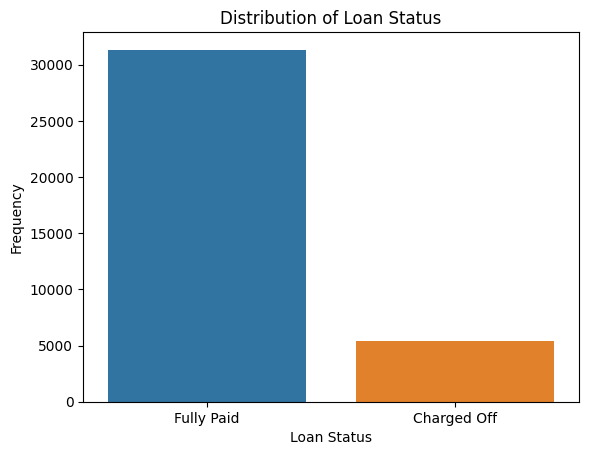

In [44]:
#Analyzing loan status
sns.countplot(x = 'loan_status', data = loan_df,hue='loan_status')
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Frequency')
plt.show()

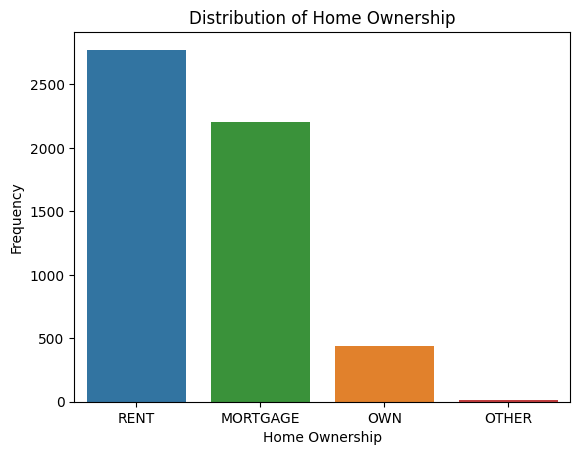

In [45]:
#Analyzing Home Ownership
sns.countplot(x = 'home_ownership', data = loan_df[loan_df.loan_status =='Charged Off'],order= loan_df[loan_df.loan_status =='Charged Off'].home_ownership.value_counts(ascending=False).index,hue='home_ownership')
plt.title('Distribution of Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Frequency')
plt.show()

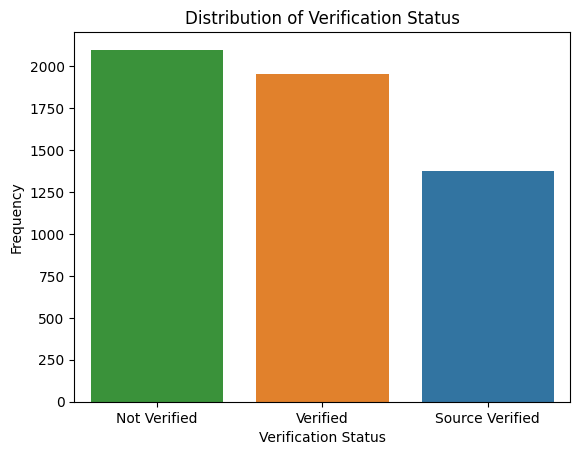

In [46]:
#Analyzing Verification Status
sns.countplot(x = 'verification_status', data = loan_df[loan_df.loan_status =='Charged Off'],order= loan_df.verification_status.value_counts(ascending=False).index,hue='verification_status')
plt.title('Distribution of Verification Status')
plt.xlabel('Verification Status')
plt.ylabel('Frequency')
plt.show()

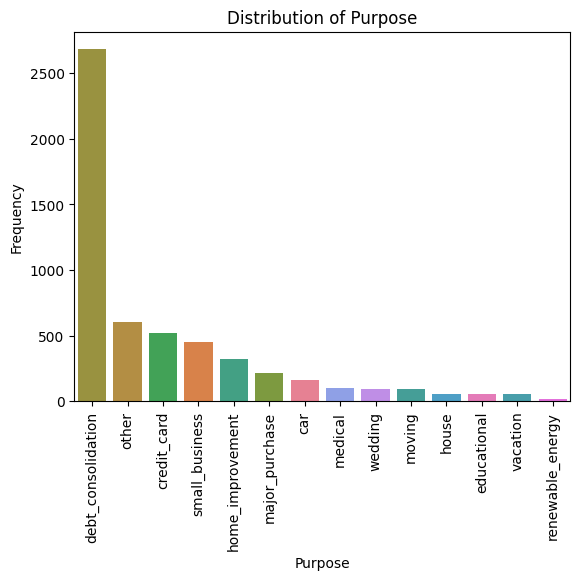

In [47]:
#Analyzing Purpose
sns.countplot(x = 'purpose', data = loan_df[loan_df.loan_status =='Charged Off'],order= loan_df[loan_df.loan_status =='Charged Off'].purpose.value_counts(ascending=False).index,hue='purpose')
plt.title('Distribution of Purpose')
plt.xlabel('Purpose')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

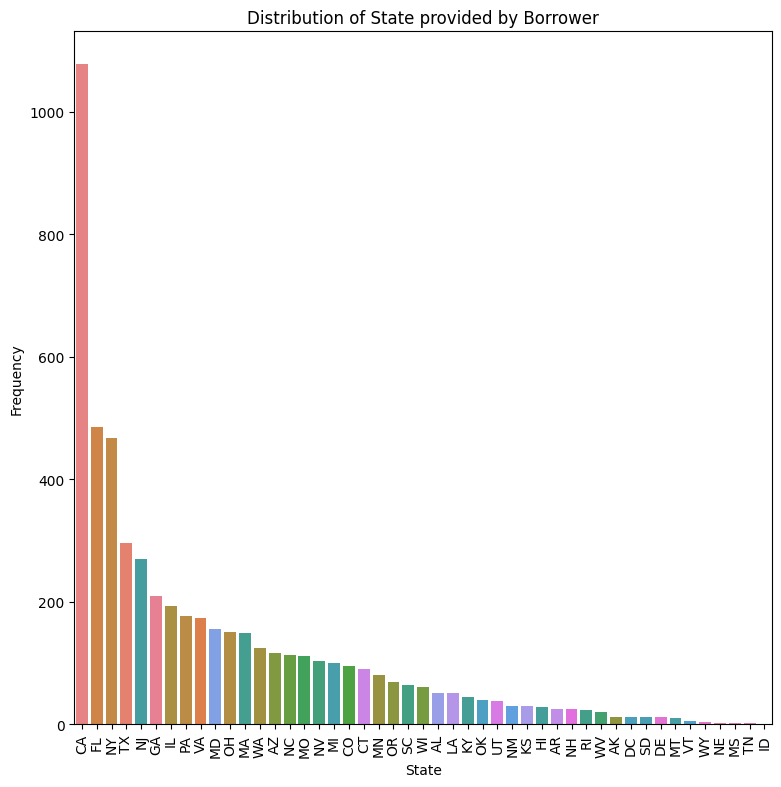

In [48]:
#Analysing addr_state
plt.figure(figsize=(9,9))
sns.countplot(x = 'addr_state', data = loan_df[loan_df.loan_status =='Charged Off'],order= loan_df[loan_df.loan_status =='Charged Off'].addr_state.value_counts(ascending=False).index,hue='addr_state')
plt.title('Distribution of State provided by Borrower')
plt.xlabel('State')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

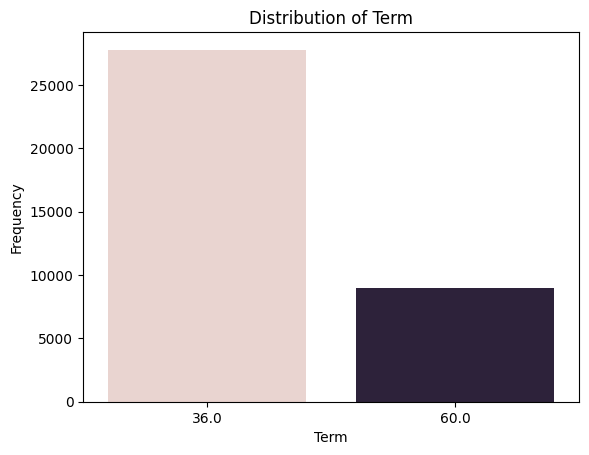

In [49]:
#analysing term
sns.countplot(x = 'term', data = loan_df,order= loan_df[loan_df.loan_status =='Charged Off'].term.value_counts(ascending=False).index,hue='term')
plt.title('Distribution of Term')
plt.xlabel('Term')
plt.ylabel('Frequency')
plt.legend([],[], frameon=False)
plt.show()

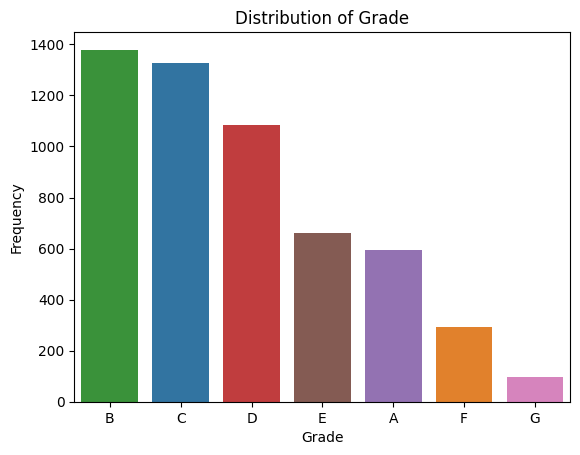

In [50]:
#analysing grade
sns.countplot(x = 'grade', data = loan_df[loan_df.loan_status =='Charged Off'],order= loan_df[loan_df.loan_status =='Charged Off'].grade.value_counts(ascending=False).index,hue='grade')
plt.title('Distribution of Grade')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.show()

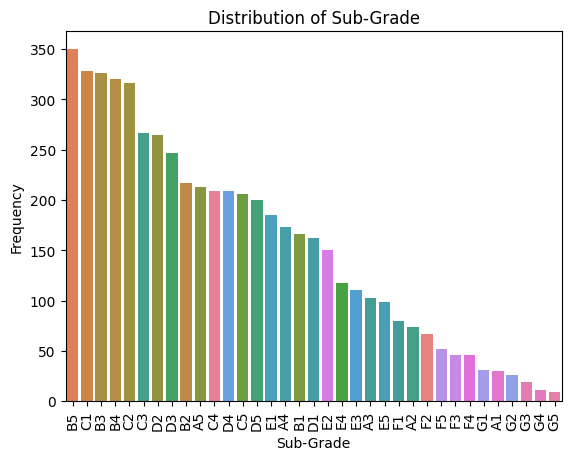

In [51]:
#analysing sub-grade
sns.countplot(x = 'sub_grade', data = loan_df[loan_df.loan_status =='Charged Off'],order= loan_df[loan_df.loan_status =='Charged Off'].sub_grade.value_counts(ascending=False).index,hue='sub_grade')
plt.title('Distribution of Sub-Grade')
plt.xlabel('Sub-Grade')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

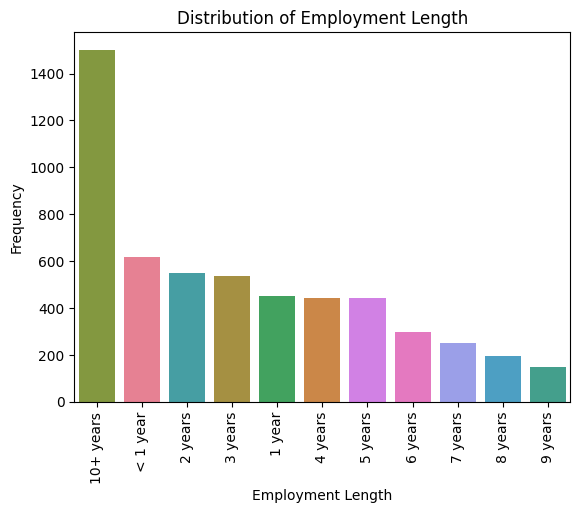

In [52]:
#analysing employment length
sns.countplot(x = 'emp_length', data = loan_df[loan_df.loan_status =='Charged Off'],order= loan_df[loan_df.loan_status =='Charged Off'].emp_length.value_counts(ascending=False).index,hue='emp_length')
plt.title('Distribution of Employment Length')
plt.xlabel('Employment Length')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

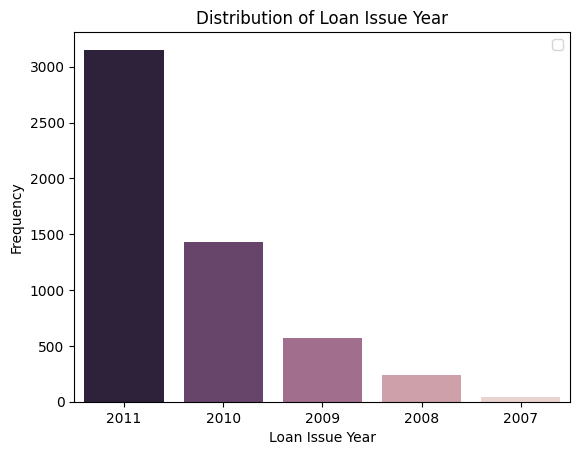

In [53]:
#analysing loan issue year
sns.countplot(x = 'issue_y', data = loan_df[loan_df.loan_status =='Charged Off'],order= loan_df[loan_df.loan_status =='Charged Off'].issue_y.value_counts(ascending=False).index,hue='issue_y')
plt.title('Distribution of Loan Issue Year')
plt.xlabel('Loan Issue Year')
plt.ylabel('Frequency')
plt.legend([],[],frameon=True)
plt.show()

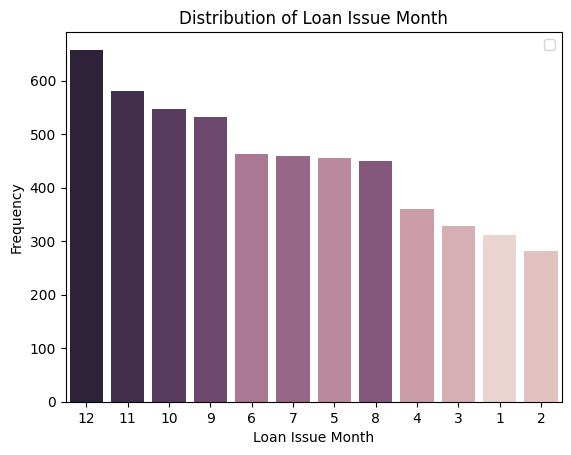

In [54]:
#analysing loan issue month
sns.countplot(x = 'issue_m', data = loan_df[loan_df.loan_status =='Charged Off'],order= loan_df[loan_df.loan_status =='Charged Off'].issue_m.value_counts(ascending=False).index,hue='issue_m')
plt.title('Distribution of Loan Issue Month')
plt.xlabel('Loan Issue Month')
plt.ylabel('Frequency')
plt.legend([],[],frameon=True)
plt.show()

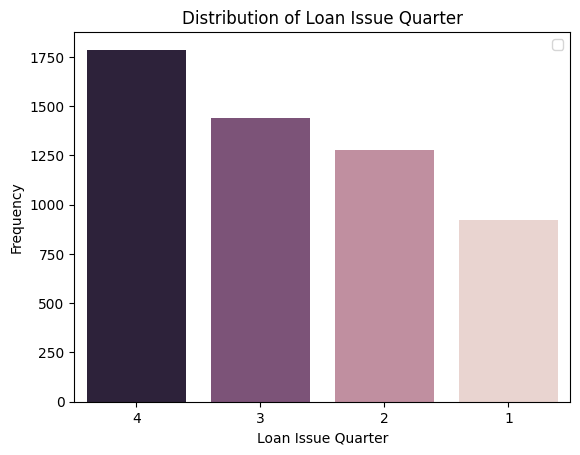

In [55]:
#analysing loan issue month
sns.countplot(x = 'issue_q', data = loan_df[loan_df.loan_status =='Charged Off'],order= loan_df[loan_df.loan_status =='Charged Off'].issue_q.value_counts(ascending=False).index,hue='issue_q')
plt.title('Distribution of Loan Issue Quarter')
plt.xlabel('Loan Issue Quarter')
plt.ylabel('Frequency')
plt.legend([],[],frameon=True)
plt.show()

__Observations-Categorical Variables__

Unordered Categorical
- Rented Households had the highest number of charge-off cases. The lending company should evaluate the loan applicants carefully before lending to rented households as they are more susceptable to default.
- Loan Applicants whose income source are not verified have higher number of charge-offs when compared with verified followed by verified from source. But the difference in not verified and verified count is not very significant.
- Loans taken for Debt consolidation purpose had the highest number of charge offs. The lending company should be cautious when approving loans for debt consolidation purpose.
- California had the highest number of chargeoffs. The lending company can implement stricter credit policies in California.

Ordered Categorical
- Short term loans (term of 36 months) had higher chargeoffs. The lending company should evaluate the loans carefully for shorter terms.
- Loans with B grade had highest number of chargeoffs indicating these customers faced difficulty in repaying the loans.
- Loans with 10 + years of experience had higher number of chargeoffs. Although, the total number of employees with 10+ years of experience is significantly higher than in other categories.
- Loans issued in 2011 had the highest number of chargeoffs.One potential reason could be economic difficulities in the specific year.
- Loans issued in fourth quarter had the highest number of chargeoffs. One potential reason for this can be that loan underwriters are providing loans with less due diligence to complete their targets.

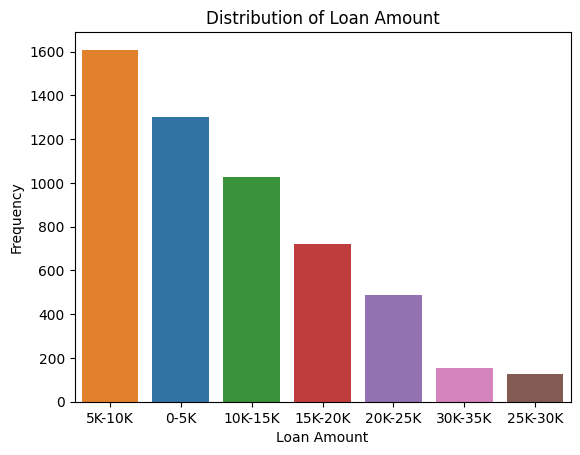

In [56]:
#analysing loan amount 
sns.countplot(x = 'loan_amnt_binned', data = loan_df[loan_df.loan_status =='Charged Off'],order= loan_df[loan_df.loan_status =='Charged Off'].loan_amnt_binned.value_counts(ascending=False).index,hue='loan_amnt_binned')
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

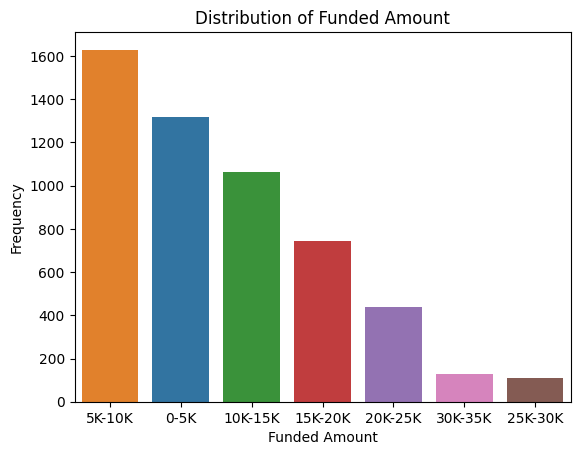

In [57]:
#analysing funded amount
sns.countplot(x = 'funded_amnt_binned', data = loan_df[loan_df.loan_status =='Charged Off'],order= loan_df[loan_df.loan_status =='Charged Off'].funded_amnt_binned.value_counts(ascending=False).index,hue='funded_amnt_binned')
plt.title('Distribution of Funded Amount')
plt.xlabel('Funded Amount')
plt.ylabel('Frequency')
plt.show()

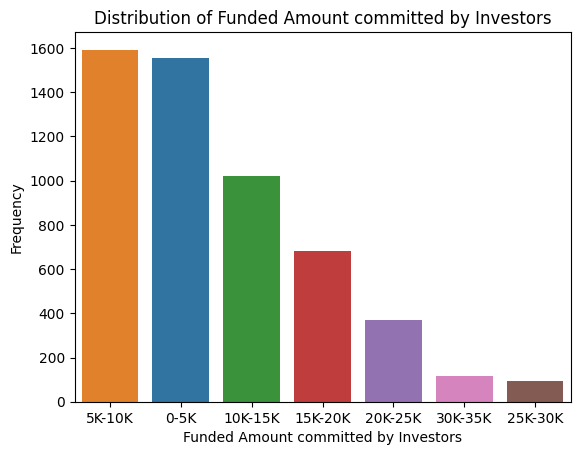

In [58]:
#analysing funded amount committed by Investors
sns.countplot(x = 'funded_amnt_inv_binned', data = loan_df[loan_df.loan_status =='Charged Off'],order= loan_df[loan_df.loan_status =='Charged Off'].funded_amnt_inv_binned.value_counts(ascending=False).index,hue='funded_amnt_inv_binned')
plt.title('Distribution of Funded Amount committed by Investors')
plt.xlabel('Funded Amount committed by Investors')
plt.ylabel('Frequency')
plt.show()

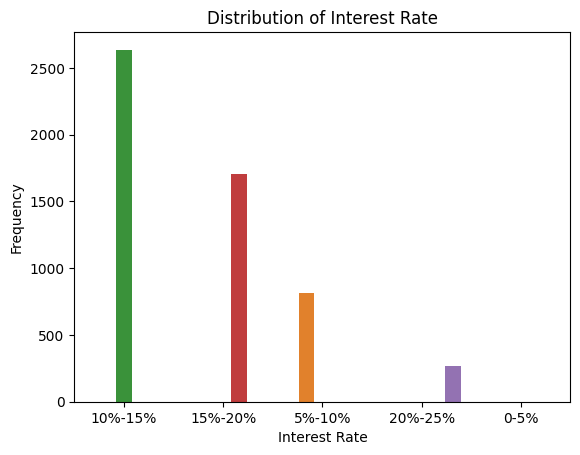

In [59]:
#analysing funded amount committed by Investors
sns.countplot(x = 'int_rate_binned', data = loan_df[loan_df.loan_status =='Charged Off'],order= loan_df[loan_df.loan_status =='Charged Off'].int_rate_binned.value_counts(ascending=False).index,hue='int_rate_binned')
plt.title('Distribution of Interest Rate')
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.show()

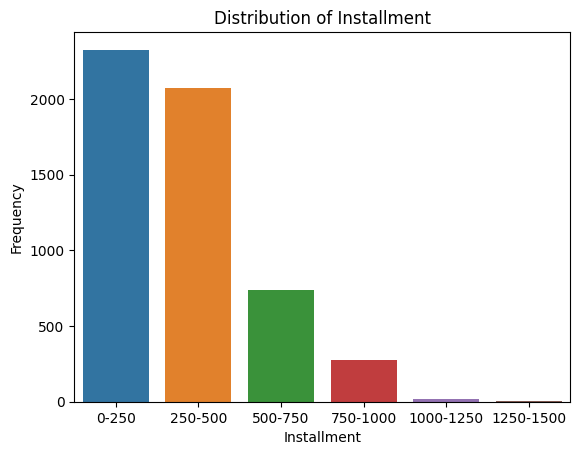

In [60]:
#analysing Installment
sns.countplot(x = 'installment_binned', data = loan_df[loan_df.loan_status =='Charged Off'],order= loan_df[loan_df.loan_status =='Charged Off'].installment_binned.value_counts(ascending=False).index,hue='installment_binned')
plt.title('Distribution of Installment')
plt.xlabel('Installment')
plt.ylabel('Frequency')
plt.show()

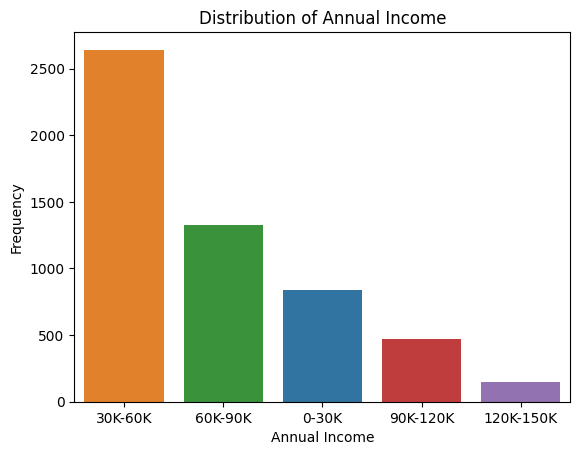

In [61]:
#analysing annual income
sns.countplot(x = 'annual_inc_binned', data = loan_df[loan_df.loan_status =='Charged Off'],order= loan_df[loan_df.loan_status =='Charged Off'].annual_inc_binned.value_counts(ascending=False).index,hue='annual_inc_binned')
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

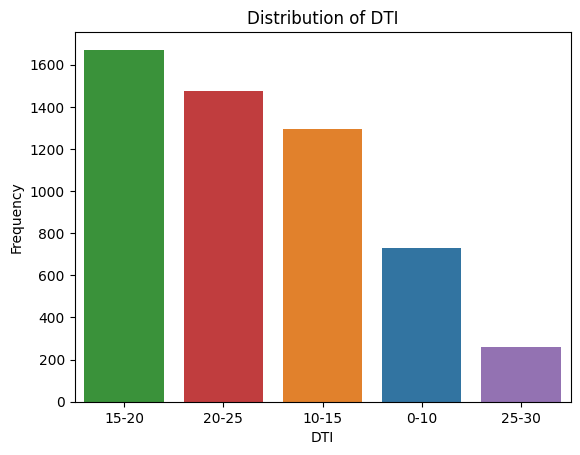

In [62]:
#analysing dti
sns.countplot(x = 'dti_binned', data = loan_df[loan_df.loan_status =='Charged Off'],order= loan_df[loan_df.loan_status =='Charged Off'].dti_binned.value_counts(ascending=False).index,hue='dti_binned')
plt.title('Distribution of DTI')
plt.xlabel('DTI')
plt.ylabel('Frequency')
plt.show()

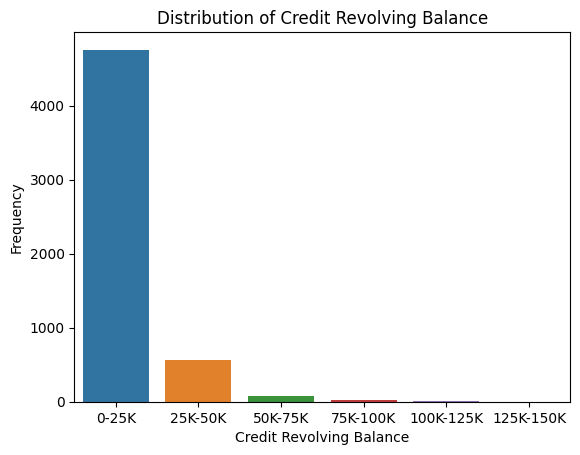

In [63]:
#analysing dti
sns.countplot(x = 'revol_bal_binned', data = loan_df[loan_df.loan_status =='Charged Off'],order= loan_df[loan_df.loan_status =='Charged Off'].revol_bal_binned.value_counts(ascending=False).index,hue='revol_bal_binned')
plt.title('Distribution of Credit Revolving Balance')
plt.xlabel('Credit Revolving Balance')
plt.ylabel('Frequency')
plt.show()

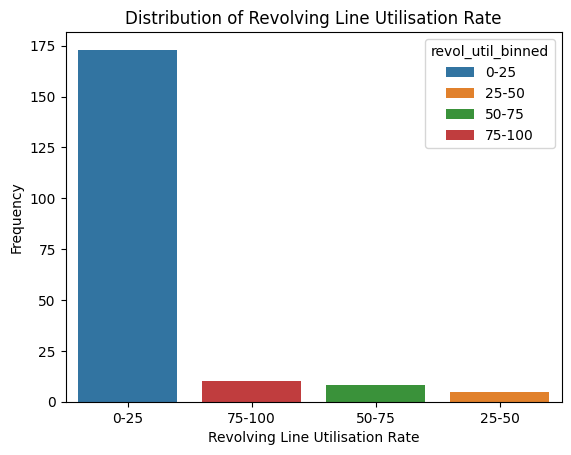

In [64]:
#analysing revol_util
sns.countplot(x = 'revol_util_binned', data = loan_df[loan_df.loan_status =='Charged Off'],order= loan_df[loan_df.loan_status =='Charged Off'].revol_util_binned.value_counts(ascending=False).index,hue='revol_util_binned')
plt.title('Distribution of Revolving Line Utilisation Rate')
plt.xlabel('Revolving Line Utilisation Rate')
plt.ylabel('Frequency')
plt.show()

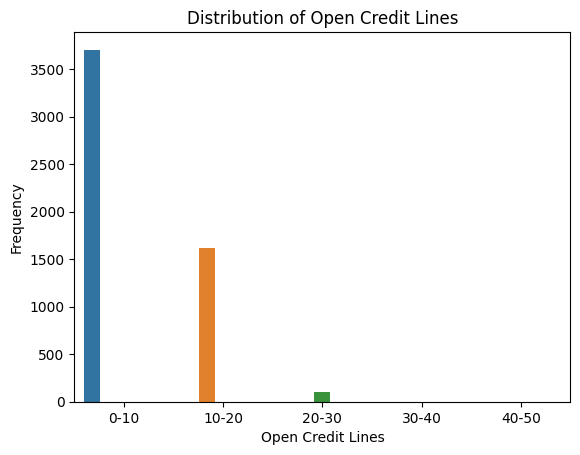

In [65]:
#analysing open_acc
sns.countplot(x = 'open_acc_binned', data = loan_df[loan_df.loan_status =='Charged Off'],order= loan_df[loan_df.loan_status =='Charged Off'].open_acc_binned.value_counts(ascending=False).index,hue='open_acc_binned')
plt.title('Distribution of Open Credit Lines')
plt.xlabel('Open Credit Lines')
plt.ylabel('Frequency')
plt.show()

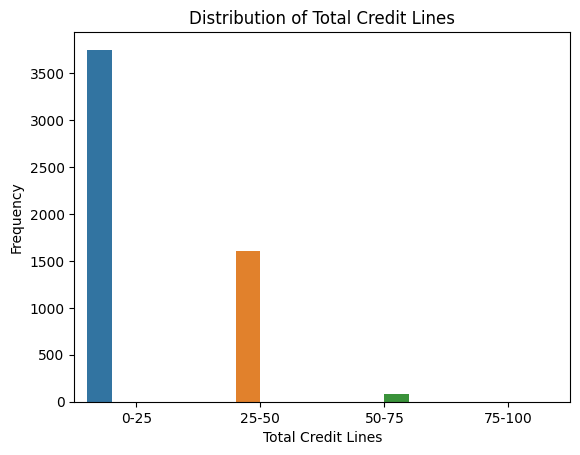

In [66]:
#analysing total_acc
sns.countplot(x = 'total_acc_binned', data = loan_df[loan_df.loan_status =='Charged Off'],order= loan_df[loan_df.loan_status =='Charged Off'].total_acc_binned.value_counts(ascending=False).index,hue='total_acc_binned')
plt.title('Distribution of Total Credit Lines')
plt.xlabel('Total Credit Lines')
plt.ylabel('Frequency')
plt.show()

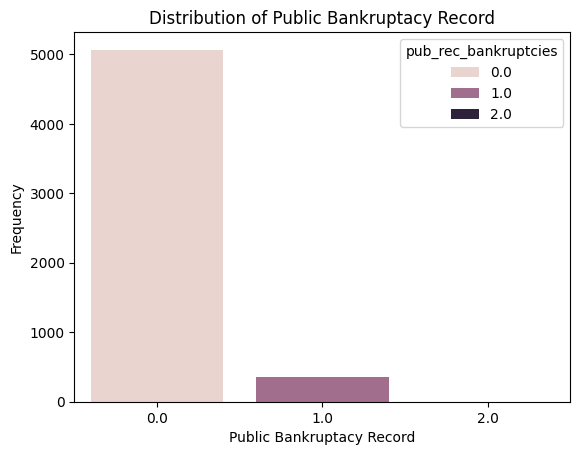

In [67]:
#analysing pub_rec
sns.countplot(x = 'pub_rec_bankruptcies', data = loan_df[loan_df.loan_status =='Charged Off'],order= loan_df[loan_df.loan_status =='Charged Off'].pub_rec_bankruptcies.value_counts(ascending=False).index,hue='pub_rec_bankruptcies')
plt.title('Distribution of Public Bankruptacy Record')
plt.xlabel('Public Bankruptacy Record')
plt.ylabel('Frequency')
plt.show()

__Observations- Quantitative Variables__

- Applied Loan Amount between 5K-10K has the highest number of chargeoffs. Lending company should be careful when sanctioning loans.
- Funded Loan Amount & Funded Loan Amount committed by investors between 5K-10K has the highest number of chargeoffs. Lending company should fund the loans only after diligent credit worthiness analysis.
- Applicants who are charged 10-15 % interest rate have the highest chargeoffs.
- Installments between 0-250 have the highest chargeoffs. Lending company should assess the risk of the applicants with similar installments.
- Applicants with income of 30K-60K have the highest chargeoffs. Lending company should thoroughly analyse the repaying capacity of low-middle income group.
- Applicants with Debt to Income ratio in 15-20 range have the highest chargeoffs. Lending company should be careful when lending to the highly indebted customers with very high debt/income ratio.
- Applicant with revolving credit balance in 0-25 K range and utilisation 0-25 range have high chargeoffs. Lending company should be catious when lending to customers with less credit history or utilisation rates.
- Applicants with 0-10 open credit lines and 0-25 total credit lines have high chargeoffs. Lending company should be cautious when lending to customers with less credit history.
- Applicants with 0 public bankruptcy record have higher chargeoffs.

### Bivariate Analysis

Following fields will be analysed as part of bivariate analysis against Loan Status (`loan_status`) column

#### 1. Categorical variables
    1. Ordered categorical data
        (i). Loan Disbursal Quarter(issue_q)
        (ii). Term of Loan(term)
        (iii). Employment Tenure(emp_length)
 
    2. Unordered categorical data
        (i). Purpose of Loan(purpose)
        (ii). Home Ownership Status(home_ownership)
        
#### 2. Quantitative variables
    (i). Loan Interest Rate(int_rate_binned)
    (ii). Annual Income range(annual_inc_binned)


In [68]:
def countplot_graph(data_dict: dict, annot=True) -> None:
    """
    Create a countplot graph.

    Args:
        data_dict (dict): A dictionary containing the following keys:
            - 'data' (DataFrame): The DataFrame containing the data.
            - 'x' (str): The column to be plotted on the x-axis.
            - 'figsize' (tuple, optional): Size of the figure in (x, y) format.
            - 'hue' (str, optional): The column to be used for color differentiation (default None).
            - 'order' (list, optional): Order of categorical values on the x-axis (default None).
            - 'xlabel' (str, optional): Label for the x-axis (default None).
            - 'ylabel' (str, optional): Label for the y-axis (default None).
            - 'title' (str, optional): Title for the plot (default None).
            - 'palette' (list, optional): List of colors for the plot (default None).
            - 'x_tick_rotation' (int, optional): Rotation value for x-axis ticks.
        annot (bool): Boolean flag to show or hide annotations. Default is True.

    Returns:
        None
    """
    df = data_dict['data']
    x = data_dict['x']
    figsize = data_dict['figsize']
    hue = data_dict.get('hue')
    order = data_dict.get('order')
    x_tick_rotation = data_dict.get('x_tick_rotation')
    xlabel = data_dict.get('xlabel')
    ylabel = data_dict.get('ylabel')
    title = data_dict.get('title')
    palette = data_dict.get('palette')

    fig, ax = plt.subplots(figsize=figsize, dpi=100)

    sns.countplot(x=x, hue=hue, data=df, order=order, palette=palette)

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    if annot:
        for p in ax.patches:
            ax.annotate('{:1}'.format(p.get_height()), (p.get_x() + 0.1, p.get_height() + 10))

    ax.set_title(title)
    
    if x_tick_rotation:
        plt.xticks(rotation=x_tick_rotation)

    plt.show()

In [69]:
def bucket_data(column, thresholds, labels) -> str:
    """
    Bucket data based on specified thresholds and labels.

    Parameters:
        column (float): The numeric value to be bucketed.
        thresholds (list of float): The list of threshold values for bucketing.
        labels (list of str): The list of labels corresponding to the buckets.

    Returns:
        str: The bucket label for the given column value.
    """
    for i, threshold in enumerate(thresholds):
        if column < threshold:
            return labels[i]
    return labels[-1]

In [70]:
# Categorising Months into quaterly buckets
threshold_months = [4, 7, 9]
quarter_labels = ['Q1', 'Q2', 'Q3', 'Q4']
loan_df['issue_q'] = loan_df['issue_m'].apply(bucket_data, args=(threshold_months, quarter_labels))

### Bivariate Analysis of Ordered Categorical Variables

1. Loan Disbursal Quarter v/s Loan Status

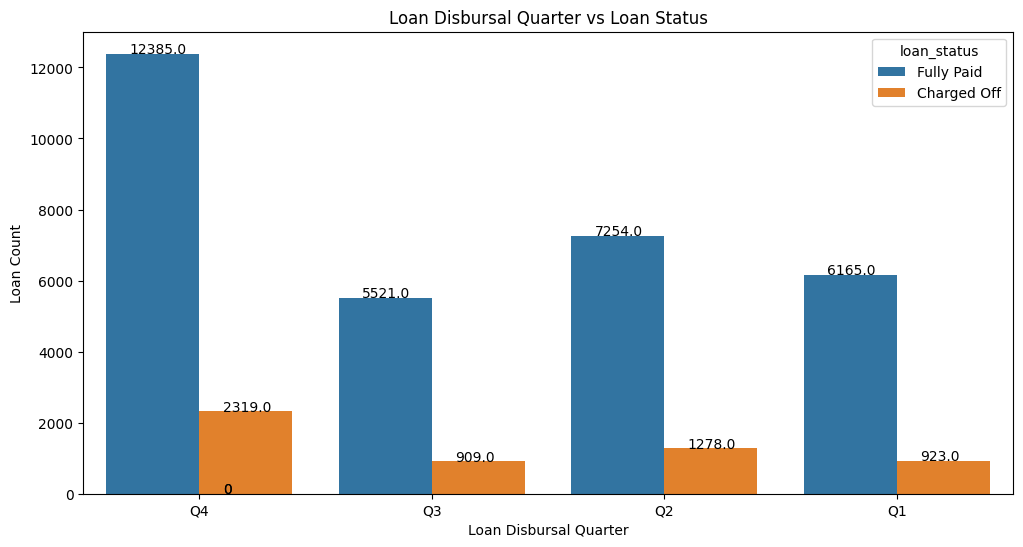

In [71]:
countplot_graph({
    'data': loan_df,
    'x': 'issue_q',
    'figsize': (12, 6),
    'hue': 'loan_status',
    'xlabel': 'Loan Disbursal Quarter',
    'ylabel': 'Loan Count',
    'title': 'Loan Disbursal Quarter vs Loan Status',
})


                Q4 is the most preferred quarter for taking loans.

2. Term of Loan v/s Loan Status

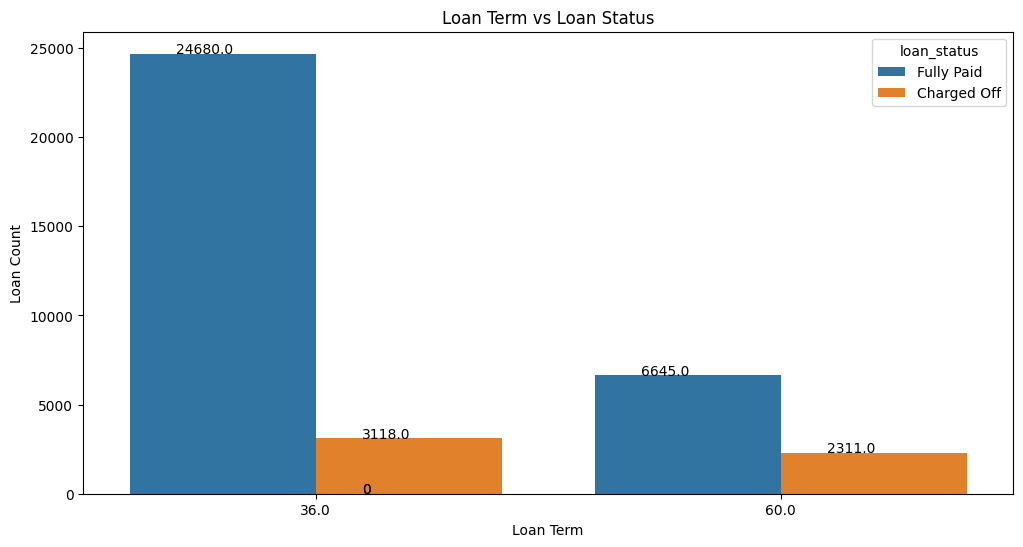

In [72]:
countplot_graph({
    'data': loan_df,
    'x': 'term',
    'figsize': (12, 6),
    'hue': 'loan_status',
    'xlabel': 'Loan Term',
    'ylabel': 'Loan Count',
    'title': 'Loan Term vs Loan Status',
})

Loan applicants those applying it for 60 months are likely to default more than the those for 36 months

3. Employment Tenure vs Loan Status


In [73]:
emp_length_mapping: dict = {
    '< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3,
    '4 years': 4, '5 years': 5, '6 years': 6, '7 years': 7,
    '8 years': 8, '9 years': 9, '10+ years': 10
}

# Use the map function to replace values in the 'emp_length' column
loan_df['emp_length'] = loan_df['emp_length'].map(emp_length_mapping)

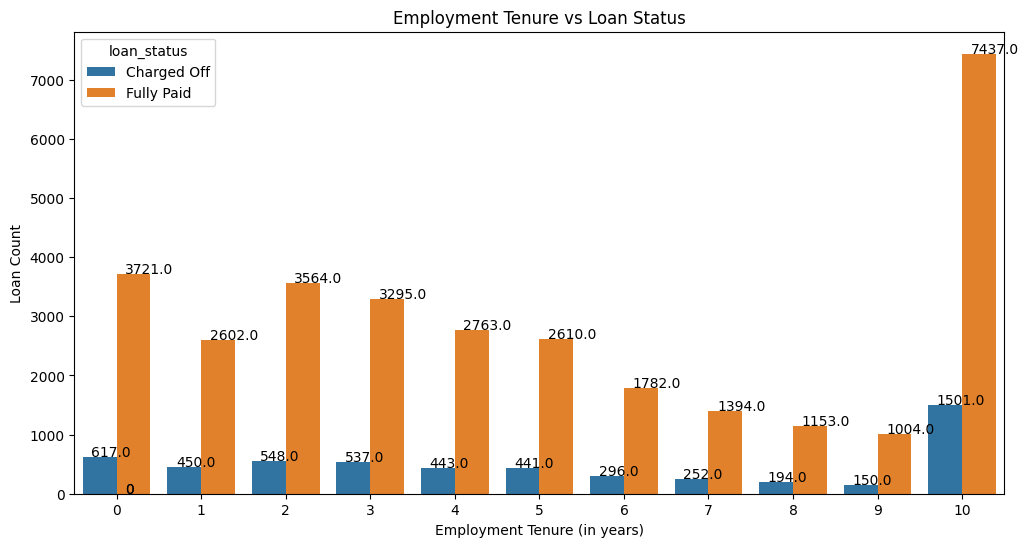

In [74]:
countplot_graph({
    'data': loan_df,
    'x': 'emp_length',
    'figsize': (12, 6),
    'hue': 'loan_status',
    'xlabel': 'Employment Tenure (in years)',
    'ylabel': 'Loan Count',
    'title': 'Employment Tenure vs Loan Status',
})

     Most number of loan applicants have 10+yrs of Work experience, they are most likely to default as well.

### Bivariate Analysis of Unordered Categorical Variables

1. Purpose of Loan v/s Loan Status

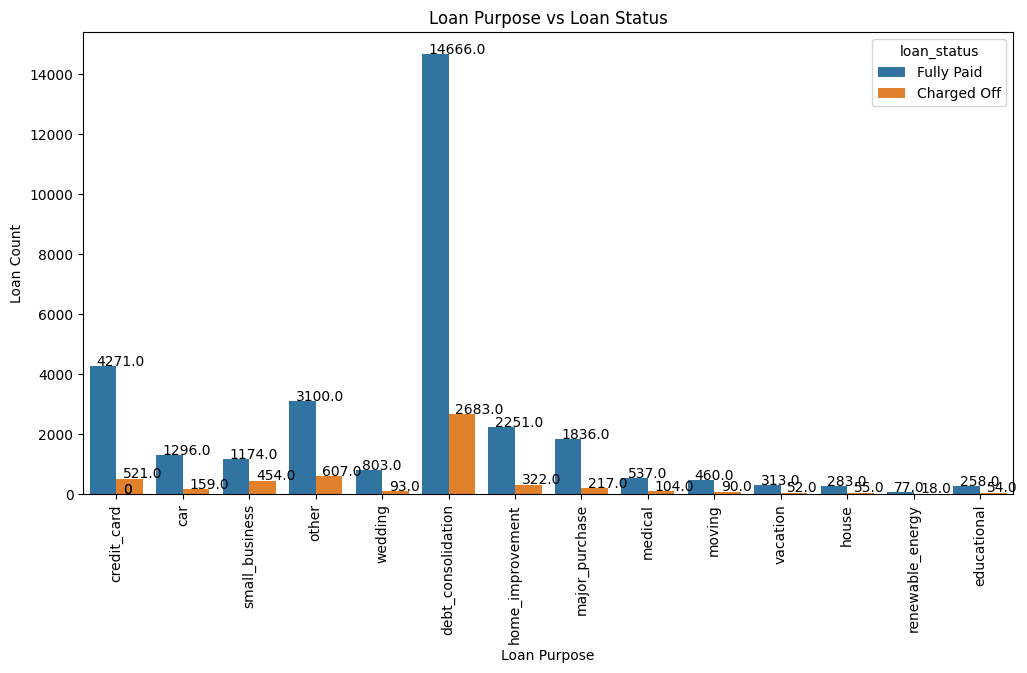

In [75]:
countplot_graph({
    'data': loan_df,
    'x': 'purpose',
    'figsize': (12, 6),
    'hue': 'loan_status',
    'xlabel': 'Loan Purpose',
    'ylabel': 'Loan Count',
    'title': 'Loan Purpose vs Loan Status',
    'x_tick_rotation': 90
})

maximum loans are issued against Debt consolidation category and at the same time most people have defaulted in this category.

2. Home Ownership Status v/s Loan Status

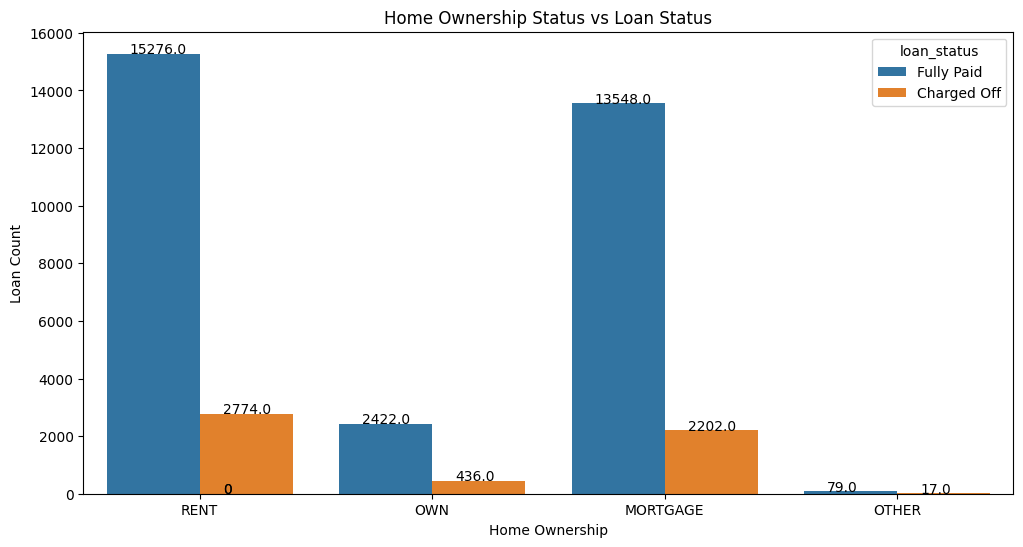

In [76]:
countplot_graph({
    'data': loan_df,
    'x': 'home_ownership',
    'figsize': (12, 6),
    'hue': 'loan_status',
    'xlabel': 'Home Ownership',
    'ylabel': 'Loan Count',
    'title': 'Home Ownership Status vs Loan Status',
})

        The applicants who stay in a rented or mortgaged house are more likely to default.

### Bivariate Analysis of Quantitative Variables

1. Annual Income range v/s Loan Status

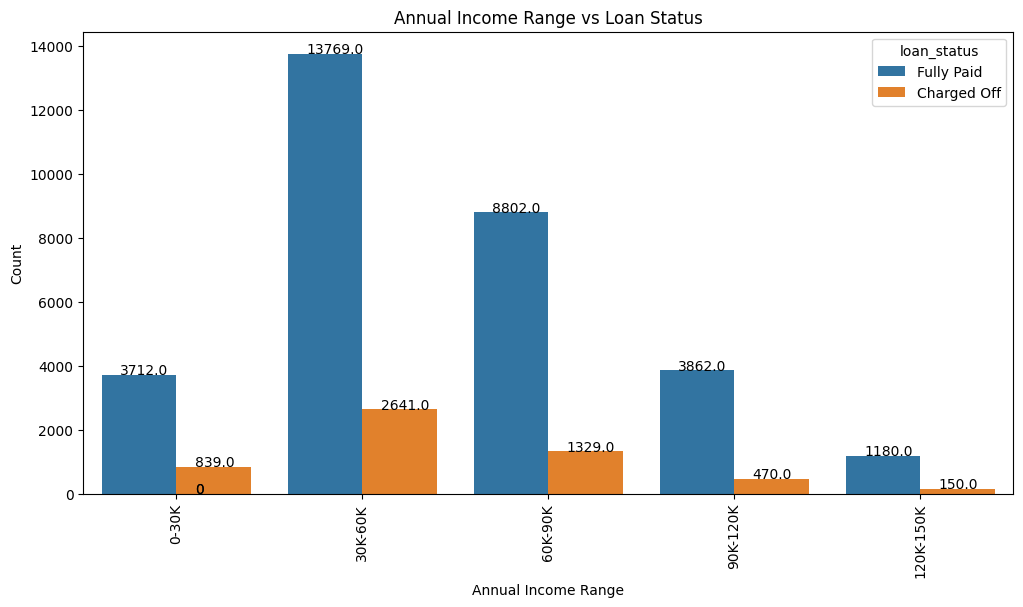

In [77]:
countplot_graph({
    'data': loan_df,
    'x': 'annual_inc_binned',
    'figsize': (12, 6),
    'hue': 'loan_status',
    'xlabel': 'Annual Income Range',
    'ylabel': 'Count',
    'title': 'Annual Income Range vs Loan Status',
    'x_tick_rotation': 90
})

Those who have annual income in the range between 30K-60K have mostly paid the loan.

2. Loan Interest Rate v/s Loan Status

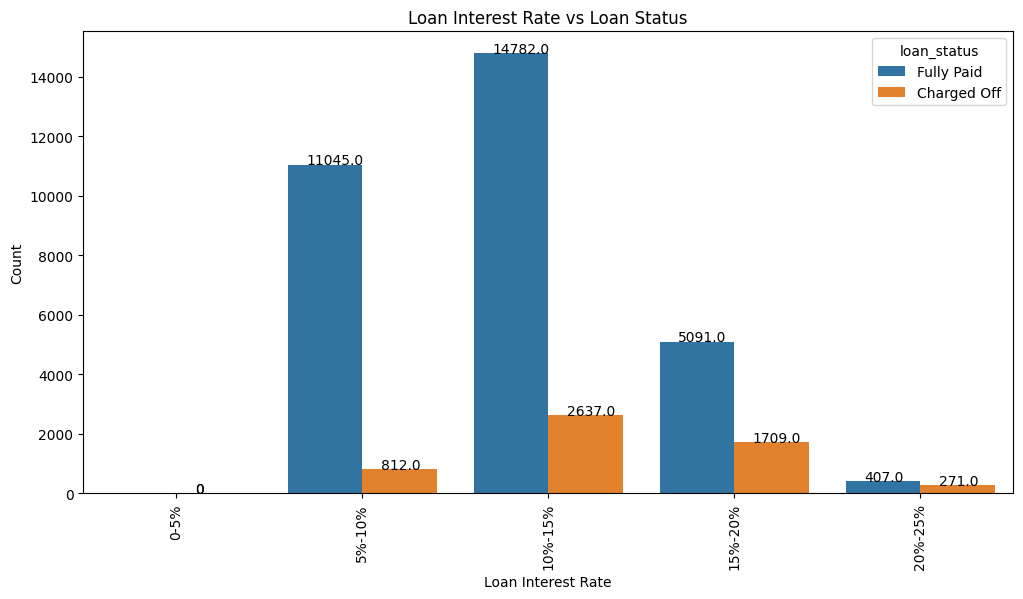

In [78]:
countplot_graph({
    'data': loan_df,
    'x': 'int_rate_binned',
    'figsize': (12, 6),
    'hue': 'loan_status',
    'xlabel': 'Loan Interest Rate',
    'ylabel': 'Count',
    'title': 'Loan Interest Rate vs Loan Status',
    'x_tick_rotation': 90
})

Most of the borrowers belong to category where Loan Interest Rate is in range of 10%-15%.

### Summary of Bivariate Analysis -

1. Q4 is the most preferred quarter for taking loans.

2. Loan applicants those applying it for 60 months are likely to default more than the those for 36 months.

3. Most number of loan applicants have 10+yrs of Work experience, they are most likely to default as well.

4. Maximum loans are issued against Debt consolidation category and at the same time most people have defaulted in this category.

5. The applicants who stay in a rented or mortgaged house are more likely to default

6. Those who have annual icome in the range between 30K-60K have mostly paid the loan.

7. Most of the borrowers belong to category where Loan Interest Rate is in range of 10%-15%.

### Conclusion of Bivariate Analysis
1. **Seasonal Trends**: December and Q4 are peak periods for loan applications, likely due to the holiday season. The company should anticipate increased demand during these periods and ensure efficient processing to meet customer needs.

2. **Term Length**: Given that applicants opting for 60-month loans are more likely to default, the company should consider evaluating the risk associated with longer-term loans and potentially limiting the maximum term or adjusting interest rates accordingly.

3. **Experience and Default Probability**: Loan applicants with ten or more years of experience are more likely to default. This suggests that experience alone may not be a reliable indicator of creditworthiness. The company should use a more comprehensive credit scoring system that factors in other risk-related attributes.

4. **Debt Consolidation Risk**: Since debt consolidation is the category with the maximum number of loans and high default rates, the company should carefully evaluate applicants seeking debt consolidation loans and potentially adjust interest rates or offer financial counseling services.

5. **Housing Status and Default Risk**: Applicants living in rented or mortgaged houses are more likely to default. This information can be considered in the underwriting process to assess housing stability and its impact on repayment ability.

6. **Low Annual Income**: Applicants with annual incomes less than $40,000 have a higher likelihood of defaulting. The company should consider offering financial education resources or setting maximum loan amounts based on income levels to ensure affordability for borrowers.

In [79]:
def plot_charged_off_percentage(df, column, stacked=False):
    """
    Calculate and plot the Charged Off percentage and the number of loans for a specified column.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        column (str): The column for which to calculate and plot Charged Off percentage.
        stacked (bool, optional): Whether to create a stacked bar plot (default: False).

    Returns:
        None
    """
    # Calculate Charged Off percentage
    charged_off_data = pd.crosstab(df[column], df['loan_status'], margins=True)
    charged_off_data['Total'] = charged_off_data['Charged Off'] + charged_off_data['Fully Paid']
    charged_off_data['Charged Off %'] = round((charged_off_data['Charged Off'] * 100 / charged_off_data['Total']), 2)
    # Remove the last row with sum total
    charged_off_data = charged_off_data[0:-1]

    # Plot
    fig, ax1 = plt.subplots(figsize=(20, 8))

    # Line plot for Charged Off Percentage
    charged_off_plot = charged_off_data[['Charged Off %']]
    line = charged_off_plot.plot(ax=ax1, marker='o', color='r', lw=2)
    line.set_title(column.title() + ' vs Charged Off %', fontsize=20, weight="bold")
    line.set_xlabel(column.title())
    line.set_ylabel('Charged Off %')

    # Bar plot for Number of Loans
    loans_plot = charged_off_data.iloc[:, 0:3]
    ax2 = loans_plot.plot(kind='bar', ax=ax1, rot=1, secondary_y=True, stacked=stacked)
    ax2.set_ylabel('Number of Loans')
    
    plt.show()

### Multivariate Analysis

Multivariate analysis for below listed columns against loan status and the charged off percentage.

1. Employment Tenure
2. Loan Purpose
3. Home Ownership Status
4. Annual Income Range 

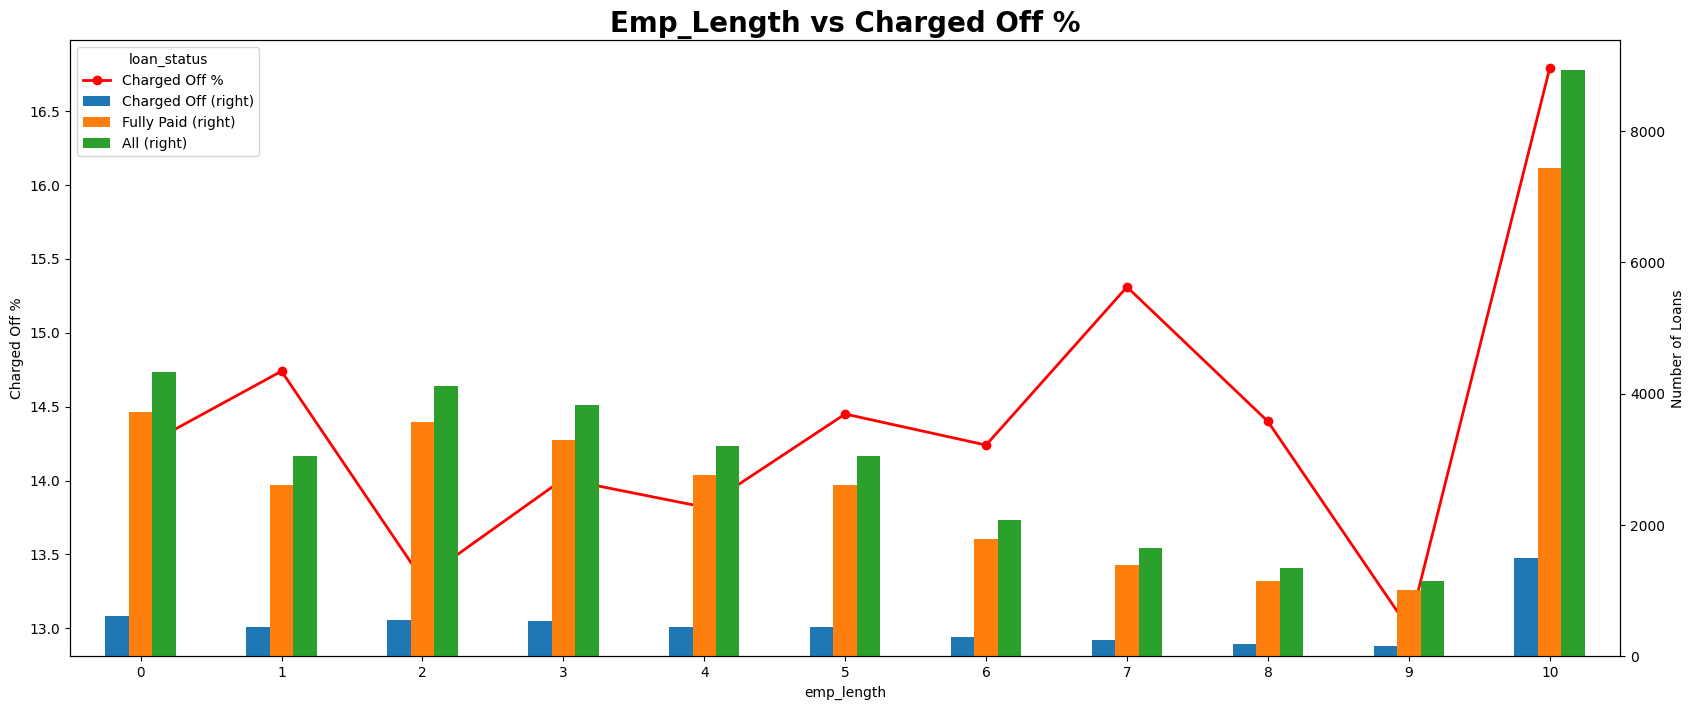

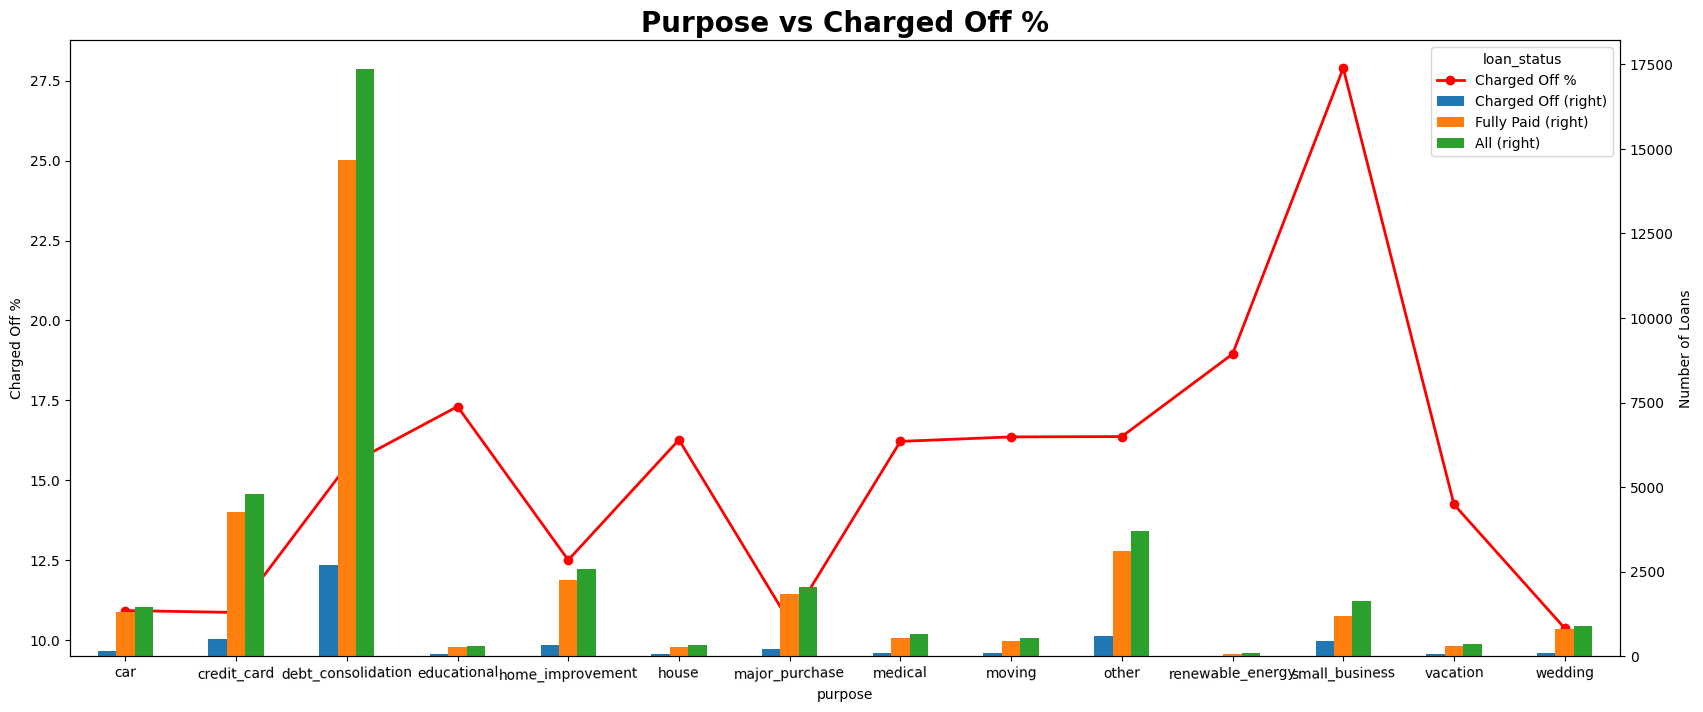

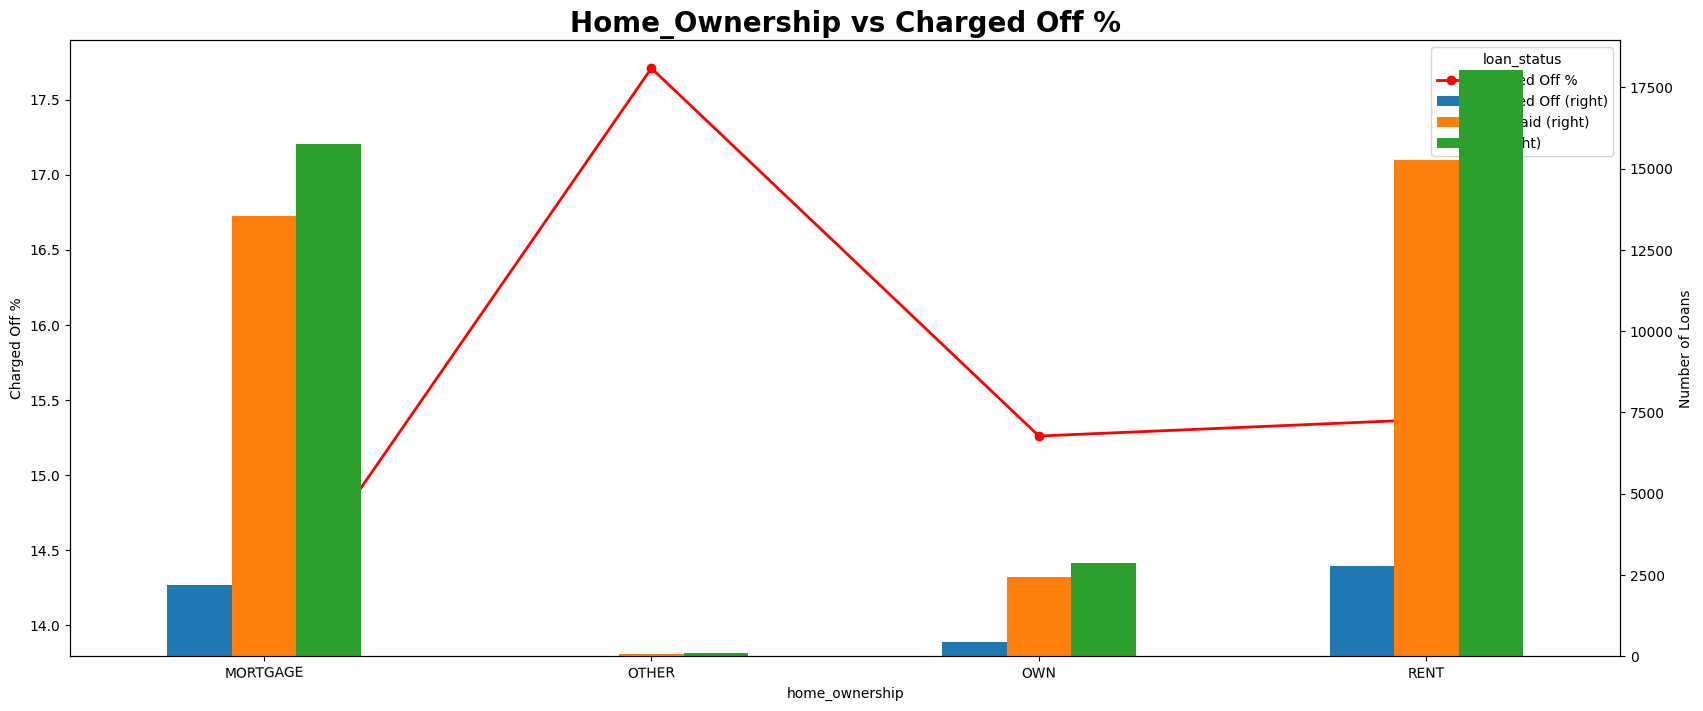

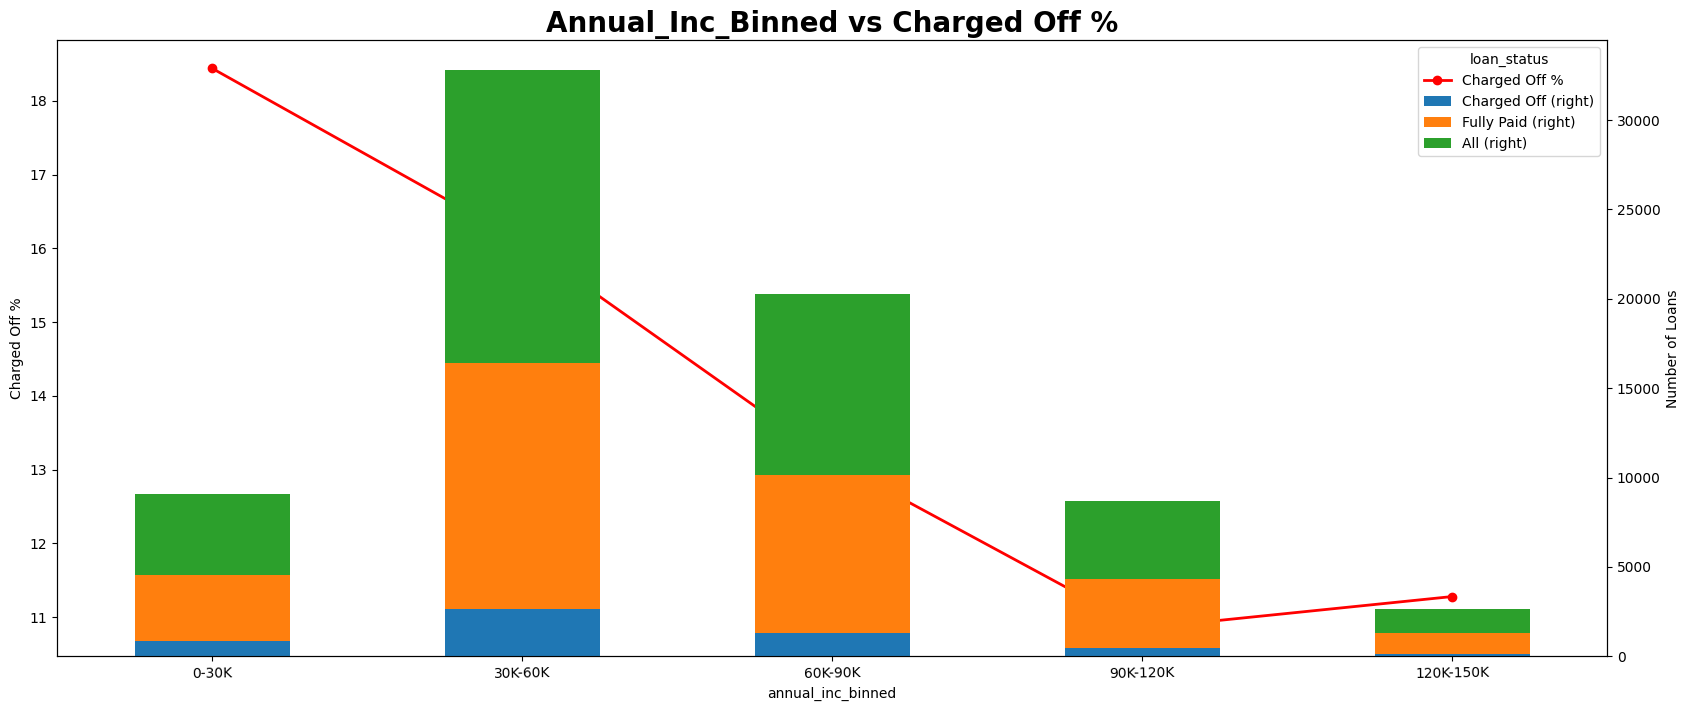

In [80]:
columns_config = {
    'emp_length': {},
    'purpose':{},
    'home_ownership': {},
    'annual_inc_binned': {'stacked': True},
}

for column, plot_config in columns_config.items():
    stacked = plot_config.get('stacked', False)
    plot_charged_off_percentage(loan_df, column, stacked)